# Recognizing Handwritten Digits on MNIST Dataset using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
df = pd.read_csv("./train.csv")
df.shape

(42000, 785)

In [3]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:, 1:]
y = data[:, 0]

X.shape, y.shape

((42000, 784), (42000,))

In [7]:
split = int(0.8 * X.shape[0])
print(split)

X_train = X[:split, :]
X_test = X[split:, :]

y_train = y[:split]
y_test = y[split:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

33600
(33600, 784) (8400, 784)
(33600,) (8400,)


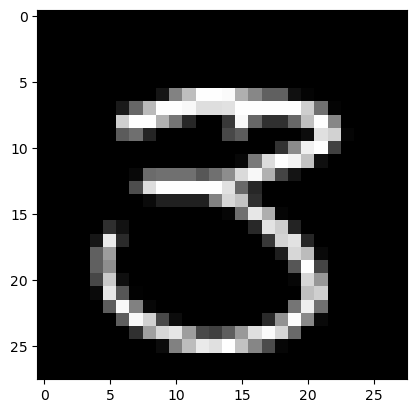

3


In [8]:
# Let's Visualize some samples

def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap="gray")
    plt.show()

drawImg(X_train[7])
print(y_train[7])

## Applying KNN

In [9]:
def dist(x1, x2):
    return np.sqrt(sum((x1 - x2) ** 2))

In [10]:
def KNN(X, Y, queryPoint, k=5):
    vals = []
    m = X.shape[0]

    for i in range(m):
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    vals = vals[:k]

    vals = np.array(vals)

    # print(vals)

    new_vals = np.unique(vals[:, 1], return_counts=True)
    # print(new_vals)

    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

## Make Some Predictions

In [11]:
pred = KNN(X_train, y_train, X_test[0])
print(int(pred))

0


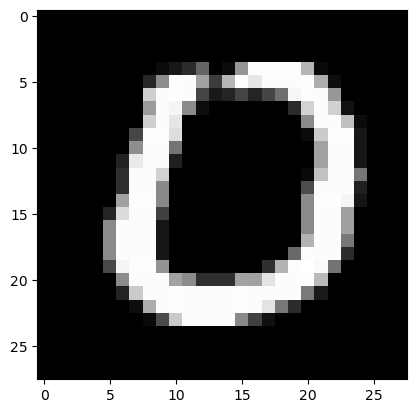

0


In [12]:
drawImg(X_test[0])
print(y_test[0])

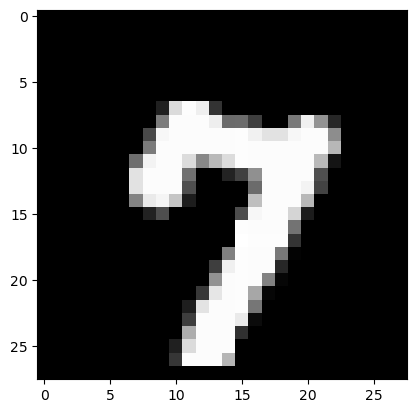

In [13]:
drawImg(X_test[1])

In [14]:
int(KNN(X_train, y_train, X_test[1]))

7

# Implementing the same thing with `Scikit-Learn`

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [16]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X = df.drop("label", axis=1)
y = df["label"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

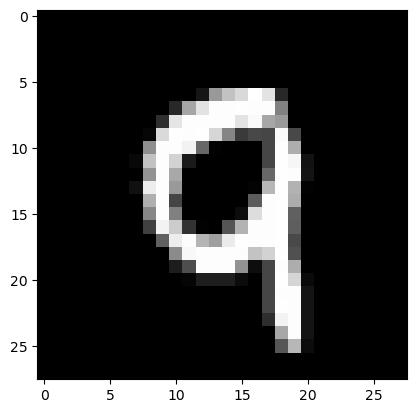

In [20]:
drawImg(X_test.iloc[70].values)

In [21]:
clf.predict(X_test.iloc[[70]])

array([9])

In [23]:
clf.score(X_test, y_test)

0.9648809523809524

# [Dont't Click Me😱](https://www.linkedin.com/in/anand-velpuri/) 